In [204]:
import pandas as pd
import os

In [205]:
dir=r"C:\Users\vichu\Documents\assign\Inputfiles"
df=pd.read_csv(os.path.join(dir,"carMPG.csv"))

In [206]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2015,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2015,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2015,1,ford torino


In [207]:
features=['Cylinders', 'Displacement', 'Weight', 'Acceleration',
       'Model_year', 'Origin']

In [214]:
X_train=df[features]

In [215]:
y=df['MPG']

## FINDING FEATURE IMPORTANCES

In [216]:
from sklearn import tree

In [211]:
feature_selector=tree.DecisionTreeRegressor()

In [217]:
feature_selector.fit(X_train,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [218]:
import matplotlib.pyplot as plt

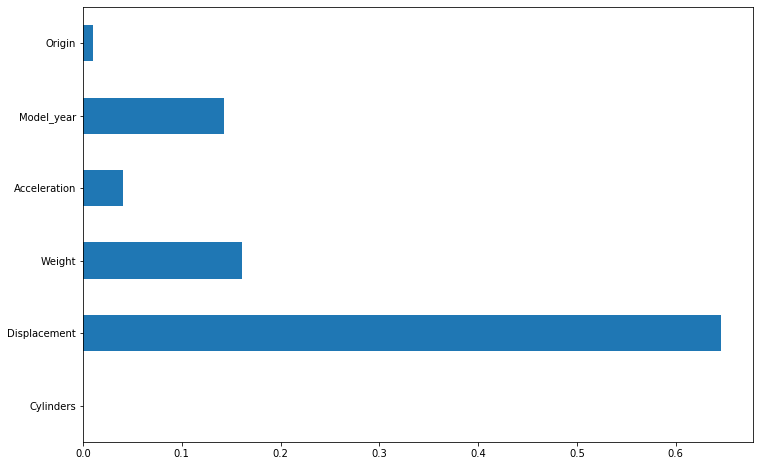

In [219]:
importances=pd.Series(feature_selector.feature_importances_, index=X_train.columns) 
importances.plot(kind='barh', figsize=(12,8))

## Since we can visulaize only until 3D lets take 2 top features for 
## MULTIVARIATE REGRESSION

In [220]:
X=df[['Displacement','Weight']]

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=2)

In [222]:
X_train.shape

(298, 2)

In [223]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [224]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [225]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [226]:
import numpy as np

In [227]:
X_train=X_train.to_numpy()

In [228]:
X_train.shape

(298, 2)

In [229]:
X_test=X_test.to_numpy()

In [246]:
X_test.shape

(100, 2)

## Normalization

In [231]:
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]

## lets start with 1000 iterations

In [232]:
theta, cost = linear_regression(X_train, y_train,0.0001,1000)

In [233]:
theta

array([[ 2.20746171, -0.56593395, -0.58239971]])

In [234]:
cost

array([299.303843  , 299.24207904, 299.18032893, 299.11859266,
       299.05687023, 298.99516164, 298.93346688, 298.87178595,
       298.81011884, 298.74846555, 298.68682609, 298.62520044,
       298.5635886 , 298.50199057, 298.44040634, 298.37883592,
       298.3172793 , 298.25573647, 298.19420743, 298.13269219,
       298.07119073, 298.00970305, 297.94822915, 297.88676902,
       297.82532267, 297.76389009, 297.70247127, 297.64106621,
       297.57967491, 297.51829737, 297.45693358, 297.39558354,
       297.33424725, 297.2729247 , 297.21161588, 297.1503208 ,
       297.08903946, 297.02777184, 296.96651795, 296.90527778,
       296.84405133, 296.7828386 , 296.72163957, 296.66045426,
       296.59928266, 296.53812475, 296.47698055, 296.41585004,
       296.35473322, 296.29363009, 296.23254065, 296.17146489,
       296.11040281, 296.04935441, 295.98831968, 295.92729862,
       295.86629122, 295.80529749, 295.74431741, 295.683351  ,
       295.62239823, 295.56145912, 295.50053365, 295.43

## Visulaising COST 

Text(0, 0.5, 'Cost')

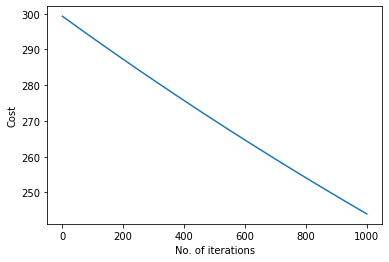

In [236]:
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,1001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

Text(0.5, 0, 'MPG')

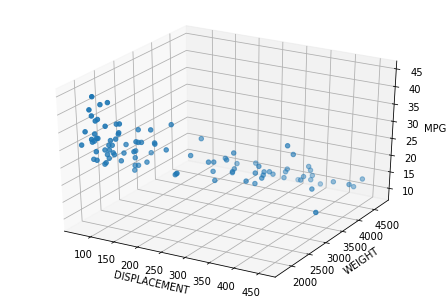

In [237]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_test.transpose()[0])
sequence_containing_y_vals = list(X_test.transpose()[1])
sequence_containing_z_vals = list(y_test)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('DISPLACEMENT', fontsize=10)
ax.set_ylabel('WEIGHT', fontsize=10)
ax.set_zlabel('MPG', fontsize=10)

In [238]:
mean = np.ones(X_test.shape[1])
std = np.ones(X_test.shape[1])
for i in range(0, X_test.shape[1]):
    mean[i] = np.mean(X_test.transpose()[i])
    std[i] = np.std(X_test.transpose()[i])
    for j in range(0, X_test.shape[0]):
        X_test[j][i] = (X_test[j][i] - mean[i])/std[i]

In [250]:
# Getting the predictions...
X_test1 = np.concatenate((np.ones((X_test.shape[0],1)), X_test),axis = 1)
predictions = hypothesis(theta, X_test1, X_test1.shape[1] - 1)

Text(0.5, 0, 'Housing Price Predictions')

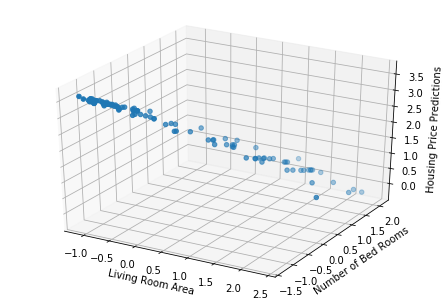

In [240]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_test1.transpose()[1])
sequence_containing_y_vals = list(X_test1.transpose()[2])
sequence_containing_z_vals = list(predictions)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,sequence_containing_z_vals)
#ax.plot_surface(xx, yy, zz, color='None',rstride=1,cstride=1,alpha = 0.4)
ax.set_xlabel('Displacement', fontsize=10)
ax.set_ylabel('Weight', fontsize=10)
ax.set_zlabel('MPG', fontsize=10)

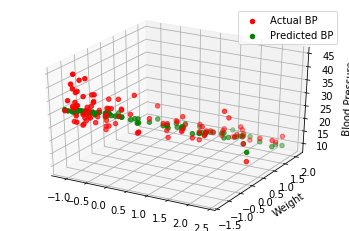

In [296]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='r', label='Actual MPG')
ax.scatter(X_test[:, 0], X_test[:, 1], predictions, color='g', label='Predicted MPG')
#ax.plot_trisurf(xx, yy, zz, alpha=0.5)
ax.set_xlabel('Displacement')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.legend()
plt.show()

# iterations 1000 does'nt seem to do good on test data lets calculate R2 

In [242]:
from sklearn import metrics

In [244]:
r2=metrics.r2_score

In [245]:
r2(y_test,predictions)

-7.602356532489772

# lets increase the iterations to 20000

In [252]:
theta, cost = linear_regression(X_train, y_train,0.0001,20000)

Text(0, 0.5, 'Cost')

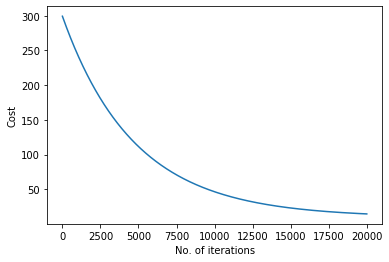

In [254]:
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,20001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [255]:
predictions = hypothesis(theta, X_test1, X_test1.shape[1] - 1)

Text(0.5, 0, 'Housing Price Predictions')

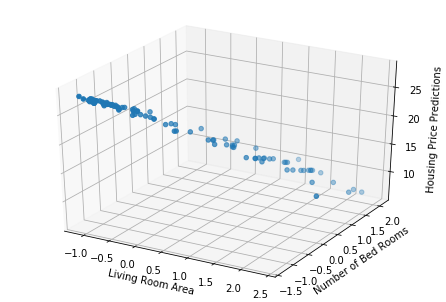

In [256]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_test1.transpose()[1])
sequence_containing_y_vals = list(X_test1.transpose()[2])
sequence_containing_z_vals = list(predictions)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,sequence_containing_z_vals)
#ax.plot_surface(xx, yy, zz, color='None',rstride=1,cstride=1,alpha = 0.4)
ax.set_xlabel('Displacement', fontsize=10)
ax.set_ylabel('Weight', fontsize=10)
ax.set_zlabel('MPG', fontsize=10)

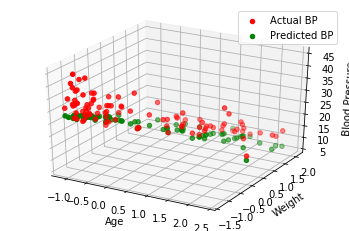

In [257]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='r', label='Actual MPG')
ax.scatter(X_test[:, 0], X_test[:, 1], predictions, color='g', label='Predicted MPG')
#ax.plot_trisurf(xx, yy, zz, alpha=0.5)
ax.set_xlabel('Displacement')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.legend()
plt.show()

In [258]:
r2(y_test,predictions)

0.43461141710462614

# lets increase the iterations to 40000

In [288]:
theta, cost = linear_regression(X_train, y_train,0.0001,40000)

Text(0, 0.5, 'Cost')

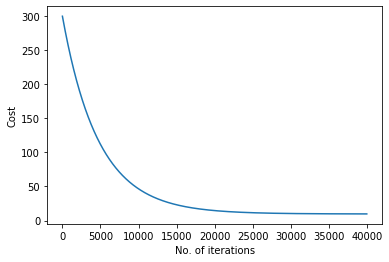

In [290]:
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,40001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

## looks like cost function is getting constant after 25000 iterations

In [283]:
predictions = hypothesis(theta, X_test1, X_test1.shape[1] - 1)

Text(0.5, 0, 'Housing Price Predictions')

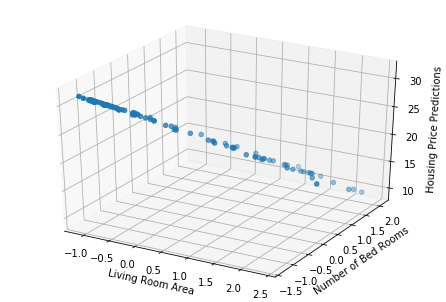

In [284]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_test1.transpose()[1])
sequence_containing_y_vals = list(X_test1.transpose()[2])
sequence_containing_z_vals = list(predictions)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,sequence_containing_z_vals)
#ax.plot_surface(xx, yy, zz, color='None',rstride=1,cstride=1,alpha = 0.4)
ax.set_xlabel('Displacement', fontsize=10)
ax.set_ylabel('Weight', fontsize=10)
ax.set_zlabel('MPG', fontsize=10)

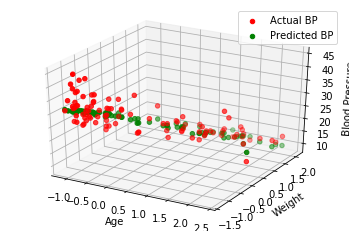

In [285]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='r', label='Actual MPG')
ax.scatter(X_test[:, 0], X_test[:, 1], predictions, color='g', label='Predicted MPG')
#ax.plot_trisurf(xx, yy, zz, alpha=0.5)
ax.set_xlabel('Displacement')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.legend()
plt.show()

In [286]:
r2(y_test,predictions)

0.7155197978414083

## lets reduce the learning rate and fix iterations to 5000

In [291]:
theta, cost = linear_regression(X_train, y_train,0.01,5000)

Text(0, 0.5, 'Cost')

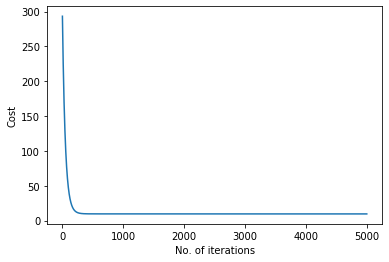

In [293]:
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,5001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [294]:
predictions = hypothesis(theta, X_test1, X_test1.shape[1] - 1)

Text(0.5, 0, 'Housing Price Predictions')

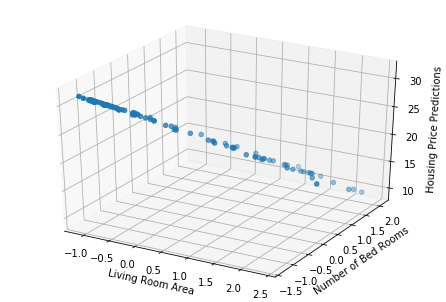

In [295]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
sequence_containing_x_vals = list(X_test1.transpose()[1])
sequence_containing_y_vals = list(X_test1.transpose()[2])
sequence_containing_z_vals = list(predictions)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,sequence_containing_z_vals)
#ax.plot_surface(xx, yy, zz, color='None',rstride=1,cstride=1,alpha = 0.4)
ax.set_xlabel('Displacement', fontsize=10)
ax.set_ylabel('Weight', fontsize=10)
ax.set_zlabel('MPG', fontsize=10)

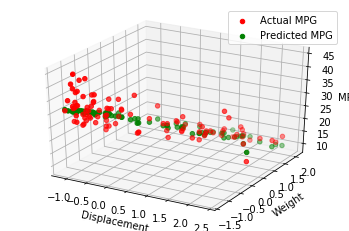

In [297]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='r', label='Actual MPG')
ax.scatter(X_test[:, 0], X_test[:, 1], predictions, color='g', label='Predicted MPG')
#ax.plot_trisurf(xx, yy, zz, alpha=0.5)
ax.set_xlabel('Displacement')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.legend()
plt.show()

In [298]:
r2(y_test,predictions)

0.7155197978414083

## this seem to be performing good